# <u>Abalone age analysis</u>
## by Rafat Khan

> GOAL: find correlation between dimensions of an Abalone's age and it's dimensions in weight, size, and gender

## *Importing libraries*

In [1]:
!source venv/bin/activate

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from statsmodels.stats.outliers_influence import variance_inflation_factor

/Users/rafatkhan/Documents/CODES/Abalone_OLS_Analysis/venv/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## *Importing data and basic conversions*

In [3]:
# Set cols and read in data
col_names = ['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']
df_abalone = pd.read_csv("abalone.data", names=col_names)

In [4]:
# assign numeric values to catergorical values
# in other words, treat "sex" as a dummy variables

#df_abalone['sex'] = df_abalone['sex'].map({"M":1,"F":0})

## <u>Checking data</u>

In [5]:
#check data
df_abalone.head(5)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
#checking shape of data and it's types

print("SHAPE:")
print(df_abalone.shape)
print("\nDTYPES:")
print(df_abalone.dtypes)

SHAPE:
(4177, 9)

DTYPES:
sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object


In [8]:
#checking for any missing data that have been filled with "NaN"

missing_data = df_abalone.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

sex
False    4177
Name: sex, dtype: int64

length
False    4177
Name: length, dtype: int64

diameter
False    4177
Name: diameter, dtype: int64

height
False    4177
Name: height, dtype: int64

whole_weight
False    4177
Name: whole_weight, dtype: int64

shucked_weight
False    4177
Name: shucked_weight, dtype: int64

viscera_weight
False    4177
Name: viscera_weight, dtype: int64

shell_weight
False    4177
Name: shell_weight, dtype: int64

rings
False    4177
Name: rings, dtype: int64



> Although *abalone.names* tells us that the data is not missing any variables and that its been used as is for other models, I find it as good practice to comb through it myself.

In addition, the *abalone.data* file did not have column names for each dataset, which is obviously crucial to identifying the variables, therefore I assigned names based on the info given from the *abalone.names* file

## Understanding the data
Looking at the statistics

In [9]:
df_abalone.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
print(f"MODE VALUES:\n{df_abalone.mode()}")

MODE VALUES:
   sex  length  diameter  height  whole_weight  shucked_weight  \
0    M   0.550      0.45    0.15        0.2225           0.175   
1  NaN   0.625       NaN     NaN           NaN             NaN   

   viscera_weight  shell_weight  rings  
0          0.1715         0.275    9.0  
1             NaN           NaN    NaN  


The *.describe()* function already tells us a lot of information. This tells us a broad understanding at the data and important data such as mean, standard deviation, and quartiles.

However the one information not given is the *MODE* value. For variable such as *sex*, *length* and *rings*: its good information to have.

<AxesSubplot:xlabel='rings', ylabel='Count'>

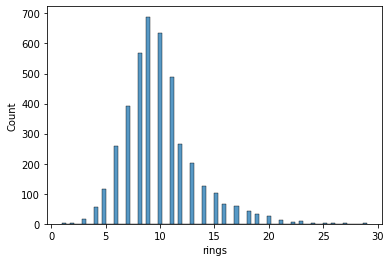

In [11]:
sns.histplot(df_abalone["rings"])

The histogram above highlights again that the average rings of an abolone is ~9.5 but there is a slight positive skewness.

## Exploratory pt 1: finding correlation

In [12]:
# create a correlation map between each variables in the dataset
cormap = df_abalone.corr()
cormap

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

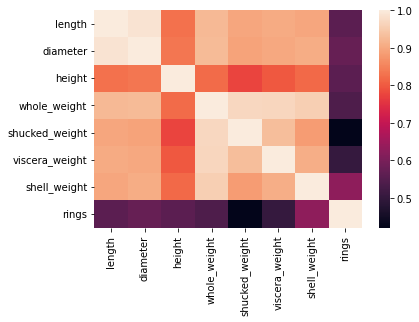

In [13]:
sns.heatmap(cormap)

### The heatmap of the correlation map is important. Although we are just interested 

In [14]:
cormap['rings']

length            0.556720
diameter          0.574660
height            0.557467
whole_weight      0.540390
shucked_weight    0.420884
viscera_weight    0.503819
shell_weight      0.627574
rings             1.000000
Name: rings, dtype: float64

In [15]:
stats.describe(df_abalone['rings'])

DescribeResult(nobs=4177, minmax=(1, 29), mean=9.933684462532918, variance=10.395265947347132, skewness=1.1137017739656028, kurtosis=2.3264623620128333)

# Should we ommit data on infants or the *sex* variable?

Questions that arise every time is whether or not the data should be cut for efficiency and/or better modeling developement. In this case they work the same way. The data's 'sex' column features MALE and FEMALE variables; but oddly enough it features INFANTS as well.

From basic biological understanding, is it fair to include data of severity include short-term, niche data such as infant data? The tests bellow would decide the inclusion of infant data in the final model and whether it could give us more information.

> ## However at the end, I have concluded to ommit the variable as a whole

In [16]:
df_abalone['sex'].value_counts().to_frame()

,sex
M,1528
I,1342
F,1307


<AxesSubplot:xlabel='sex', ylabel='rings'>

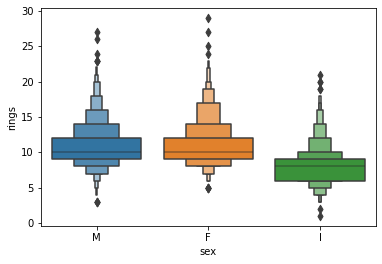

In [17]:
sns.boxenplot(x='sex',y='rings',data=df_abalone)

> The boxplot above showcases the rings(age) of our entries spread across the the 3 different sections of the 'sex' values.

<AxesSubplot:ylabel='sex-None'>

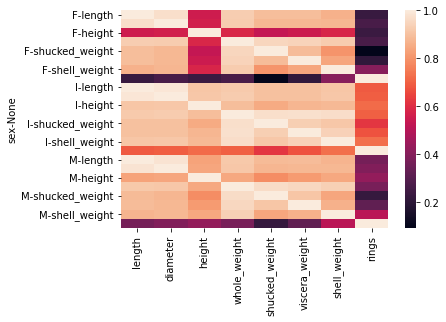

In [18]:
sns.heatmap(df_abalone.groupby(['sex']).corr())

> Similar to the correlation heatmap shown earlier, what would it look like to show further categorize the data into the 3 parts of M, F, and, I while developing a heatmap for each correlation respectively. 

In [19]:
# Create DataFrame for adult only abalones
df_abalone_adult = df_abalone.copy()

df_abalone_adult['sex'] = df_abalone_adult['sex'].map({"M":1,"F":0})
df_abalone_adult.dropna(subset=["sex"], inplace=True)
df_abalone_adult.reset_index(drop=True, inplace=True)

In [20]:
# Create DataFrame for infant inly abalones
inf = df_abalone['sex'] == "I"
df_abalone_infant = df_abalone[inf]

df_abalone_infant.drop(columns=['sex'])

df_abalone_infant.reset_index(drop=True,inplace=True)

In [21]:
#create correlation map of the adult dataframe
cormat_adult = df_abalone_adult.corr()
cormat_adult

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,1.000000,-0.092109,-0.097662,-0.088329,-0.060583,-0.031113,-0.074110,-0.077554,-0.068843
length,-0.092109,1.000000,0.978017,0.700392,0.921738,0.886616,0.888590,0.867281,0.311761
diameter,-0.097662,0.978017,1.000000,0.708706,0.917171,0.873718,0.877102,0.877115,0.339400
height,-0.088329,0.700392,0.708706,1.000000,0.716792,0.660641,0.686743,0.714636,0.334905
whole_weight,-0.060583,0.921738,0.917171,0.716792,1.000000,0.956118,0.947327,0.929890,0.327539
shucked_weight,-0.031113,0.886616,0.873718,0.660641,0.956118,1.000000,0.900791,0.822242,0.167702
viscera_weight,-0.074110,0.888590,0.877102,0.686743,0.947327,0.900791,1.000000,0.854351,0.275209
shell_weight,-0.077554,0.867281,0.877115,0.714636,0.929890,0.822242,0.854351,1.000000,0.465545
rings,-0.068843,0.311761,0.339400,0.334905,0.327539,0.167702,0.275209,0.465545,1.000000


<AxesSubplot:>

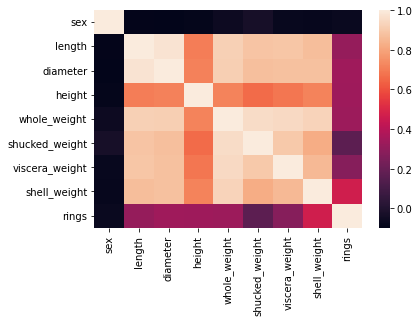

In [22]:
# Create heatmap for correlation map of adults
sns.heatmap(cormat_adult)

### Pearson Correlation test for infant question

In [23]:
# made a new function to evaluate each P value for each dataframe. Ultimately to avoid cluster and increase understanding
def check_sig(x,y):
        
    p_coef, p_val = stats.pearsonr(x,y)
        
    if p_val <0.001:
        statement = "There is STRONG evidence that the correlation is signficant"
    elif p_val<0.05:
        statement =  "There is MODERATE evidence that the correlation is significant"
    elif p_val<0.1:
        statement = "There is WEAK evidence that the correltaion is signficant"
    else:
        statement = "There is NO evidence that the correlation is significant"

    try:
        title = f"{x.name} vs {y.name}\n-------\n"
    except:
        title = "NaN\n"


    values = f"P Value: {p_val}\nPearson Coefficient: {p_coef}\n"
    return title.upper() + values + statement

In [24]:
# Perform P-value and Pearson Correlation on original data
for column in df_abalone:
    if column =="sex":
        pass
    else:
        print(check_sig(df_abalone[column],df_abalone['rings']))
        print("")

LENGTH VS RINGS
-------
P Value: 0.0
Pearson Coefficient: 0.5567195769296155
There is STRONG evidence that the correlation is signficant

DIAMETER VS RINGS
-------
P Value: 0.0
Pearson Coefficient: 0.5746598513059156
There is STRONG evidence that the correlation is signficant

HEIGHT VS RINGS
-------
P Value: 0.0
Pearson Coefficient: 0.5574673244580366
There is STRONG evidence that the correlation is signficant

WHOLE_WEIGHT VS RINGS
-------
P Value: 1.88867822e-315
Pearson Coefficient: 0.5403896769239003
There is STRONG evidence that the correlation is signficant

SHUCKED_WEIGHT VS RINGS
-------
P Value: 5.087464216197059e-179
Pearson Coefficient: 0.42088365794521304
There is STRONG evidence that the correlation is signficant

VISCERA_WEIGHT VS RINGS
-------
P Value: 8.574726436285227e-268
Pearson Coefficient: 0.5038192487597719
There is STRONG evidence that the correlation is signficant

SHELL_WEIGHT VS RINGS
-------
P Value: 0.0
Pearson Coefficient: 0.6275740445103211
There is STRON

In [25]:
# Perform P-value and Pearson Correlation on "adult" dataset
for column in df_abalone_adult:
    if column =="sex":
        pass
    else:
        print(check_sig(df_abalone_adult[column],df_abalone_adult['rings']))
        print("")

LENGTH VS RINGS
-------
P Value: 6.020569713968567e-65
Pearson Coefficient: 0.3117605297595921
There is STRONG evidence that the correlation is signficant

DIAMETER VS RINGS
-------
P Value: 2.2671854771943387e-77
Pearson Coefficient: 0.33939963344288676
There is STRONG evidence that the correlation is signficant

HEIGHT VS RINGS
-------
P Value: 2.916981057870384e-75
Pearson Coefficient: 0.3349047645268747
There is STRONG evidence that the correlation is signficant

WHOLE_WEIGHT VS RINGS
-------
P Value: 7.018453203459271e-72
Pearson Coefficient: 0.3275388736064221
There is STRONG evidence that the correlation is signficant

SHUCKED_WEIGHT VS RINGS
-------
P Value: 2.493966731312415e-19
Pearson Coefficient: 0.16770205863222118
There is STRONG evidence that the correlation is signficant

VISCERA_WEIGHT VS RINGS
-------
P Value: 1.9128274755393928e-50
Pearson Coefficient: 0.2752090529275421
There is STRONG evidence that the correlation is signficant

SHELL_WEIGHT VS RINGS
-------
P Valu

In [26]:
# Perform P-value and Pearson Correlation on "infant" dataset
for column in df_abalone_infant:
    if column =="sex":
        pass
    else:
        print(check_sig(df_abalone_infant[column],df_abalone_infant['rings']))
        print("")

LENGTH VS RINGS
-------
P Value: 2.761377564762979e-187
Pearson Coefficient: 0.6859972569127961
There is STRONG evidence that the correlation is signficant

DIAMETER VS RINGS
-------
P Value: 2.8806984581194827e-194
Pearson Coefficient: 0.6950779862677201
There is STRONG evidence that the correlation is signficant

HEIGHT VS RINGS
-------
P Value: 7.077415296475495e-215
Pearson Coefficient: 0.7200353046320007
There is STRONG evidence that the correlation is signficant

WHOLE_WEIGHT VS RINGS
-------
P Value: 3.012131748077228e-195
Pearson Coefficient: 0.6963267864490127
There is STRONG evidence that the correlation is signficant

SHUCKED_WEIGHT VS RINGS
-------
P Value: 1.702870547444978e-143
Pearson Coefficient: 0.6202457718828068
There is STRONG evidence that the correlation is signficant

VISCERA_WEIGHT VS RINGS
-------
P Value: 6.362734740167461e-178
Pearson Coefficient: 0.6732727312648502
There is STRONG evidence that the correlation is signficant

SHELL_WEIGHT VS RINGS
-------
P V

## Conclusion: Including infant data shows to have a significant impact on the results

Although all P values from the Pearson Correlation tests show that each variable show a strong evidence that the corelation is significant, the tests still show that INCLUDING infant data effects the data enough to heavily alter the outcome of the model.

**However**, that would cut down the data significantly. There is no reason to keep catergorical data for the final model (all variables must stay continous), therefore:
> ## Variable *sex* will be ommited from the test

# Finding VIF
Now that we understand that every variable is significant to the outcome of the model, I would like to find multi-collinearity between the variable. Using the Variance Inflation Factor test (VIF), I am going to start eliminating variables 1 by 1 depending on the VIF score they provide based on the matrix I have created a function for.

In [27]:
# Create new dataframe for data to be used through the VIF
df_vif=df_abalone.copy()
del df_vif['rings'],df_vif['sex']

In [28]:
# A function to calculate VIF
def calc_vif(df_vif,df_cor):

    vif_matrix = pd.DataFrame(np.linalg.inv(df_vif.corr().values), index = df_cor.index, columns=df_cor.columns)

    return vif_matrix


In [29]:
# A function that will make it easier to drop variables as we go
def drop_var(df_vif,df_cor,label):

    df_vif = df_vif.drop(labels=label,axis=1)
    df_cor = df_cor.drop(labels=label, axis=1)
    df_cor = df_cor.drop(labels=label,axis=0)

    return df_vif,df_cor

In [30]:
# Create a dataframe with a correlation with the VIF dataframe
df_cor = df_vif.corr()

## NOTE: when looking at the VIF matrix, it's important that we solely look at the main/leading diagonal.
If the VIF>6, I generally omit that variable. Usually a value around 5 but much over shows strong correlation

In [31]:
# Call calc_vif to find first variable to eliminate
calc_vif(df_vif,df_cor)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
length,40.771813,-37.022326,-0.326765,0.927988,-2.740648,-2.406348,0.899930
diameter,-37.022326,41.845452,-1.417390,-1.678139,0.600072,0.964935,-3.292544
height,-0.326765,-1.417390,3.559939,-0.404823,0.356733,-0.386653,-0.910290
whole_weight,0.927988,-1.678139,-0.404823,109.592750,-46.229611,-26.993091,-38.379451
shucked_weight,-2.740648,0.600072,0.356733,-46.229611,28.353191,5.975799,15.342189
viscera_weight,-2.406348,0.964935,-0.386653,-26.993091,5.975799,17.346276,6.371831
shell_weight,0.899930,-3.292544,-0.910290,-38.379451,15.342189,6.371831,21.258289


> By looking at the result, the highest VIF variable is to be ommited first, in this case *whole_weight*, then run the test again.

In [32]:
try:
    df_vif, df_cor = drop_var(df_vif,df_cor,"whole_weight")
    calc_vif(df_vif,df_cor)
except:
    pass
calc_vif(df_vif,df_cor)

,length,diameter,height,shucked_weight,viscera_weight,shell_weight
length,40.763955,-37.008116,-0.323337,-2.349194,-2.177781,1.224912
diameter,-37.008116,41.819755,-1.423589,-0.107818,0.551604,-3.880229
height,-0.323337,-1.423589,3.558443,0.185966,-0.486362,-1.052059
shucked_weight,-2.349194,-0.107818,0.185966,8.852112,-5.410722,-0.847451
viscera_weight,-2.177781,0.551604,-0.486362,-5.410722,10.697780,-3.081167
shell_weight,1.224912,-3.880229,-1.052059,-0.847451,-3.081167,7.817781


> In this case, the highest value is for *diameter*, thus ommiting the variable.

In [33]:
try:
    df_vif, df_cor = drop_var(df_vif,df_cor,"diameter")
    calc_vif(df_vif,df_cor)
except:
    pass
calc_vif(df_vif,df_cor)

,length,height,shucked_weight,viscera_weight,shell_weight
length,8.013867,-1.583132,-2.444607,-1.689643,-2.208872
height,-1.583132,3.509983,0.182296,-0.467585,-1.184147
shucked_weight,-2.444607,0.182296,8.851834,-5.409299,-0.857455
viscera_weight,-1.689643,-0.467585,-5.409299,10.690504,-3.029987
shell_weight,-2.208872,-1.184147,-0.857455,-3.029987,7.457755


We start noticing the variables to get much smaller as the strong effecting variables are being ommited. However some of the values are too high.


> Next we ommit: *viscera_weight*

In [34]:
try:
    df_vif, df_cor = drop_var(df_vif,df_cor,"viscera_weight")
    calc_vif(df_vif,df_cor)
except:
    pass
calc_vif(df_vif,df_cor)

,length,height,shucked_weight,shell_weight
length,7.746817,-1.657035,-3.299552,-2.687763
height,-1.657035,3.489531,-0.054298,-1.316673
shucked_weight,-3.299552,-0.054298,6.114777,-2.390601
shell_weight,-2.687763,-1.316673,-2.390601,6.598972


> Next variable to ommit is *length*

In [35]:
try:
    df_vif, df_cor = drop_var(df_vif,df_cor,"length")
    calc_vif(df_vif,df_cor)
except:
    pass
calc_vif(df_vif,df_cor)

,height,shucked_weight,shell_weight
height,3.135094,-0.760068,-1.891582
shucked_weight,-0.760068,4.709420,-3.535382
shell_weight,-1.891582,-3.535382,5.666451


## Conclusion: We have concluded the test and came with the result that *height*,*shucked_weight*, and *shell_weight*, are variables to stay for the final test

## Exploratory pt 2: Visual understanding

<AxesSubplot:xlabel='shucked_weight', ylabel='rings'>

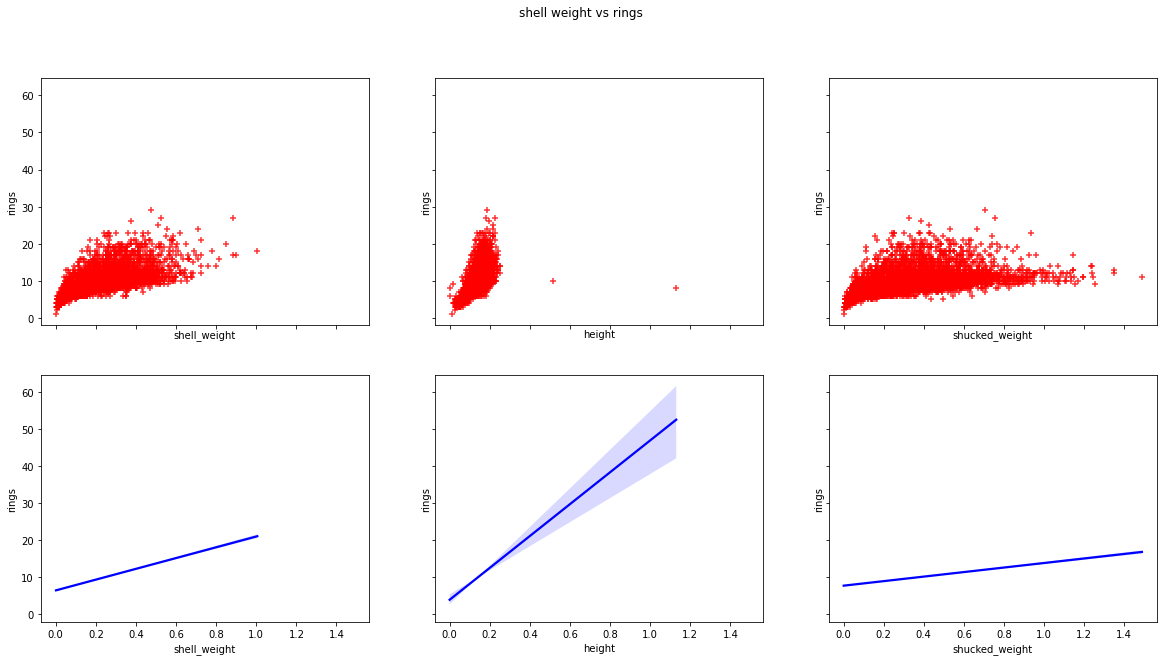

In [36]:
# Create subplot for the scatter plot and regression plot for each variables that is being used in the final model

fig, axes = plt.subplots(2,3,figsize=(20,10),sharey=True,sharex=True)
fig.suptitle("shell weight vs rings")

sns.regplot(ax=axes[0,0],x='shell_weight', y='rings', fit_reg=False,color="red",marker="+",data=df_abalone)
sns.regplot(ax=axes[1,0],x='shell_weight', y='rings', scatter=False,color='blue',data=df_abalone)

sns.regplot(ax=axes[0,1],x='height', y='rings', fit_reg=False,color="red",marker="+",data=df_abalone)
sns.regplot(ax=axes[1,1],x='height', y='rings', scatter=False,color='blue',data=df_abalone)

sns.regplot(ax=axes[0,2],x='shucked_weight', y='rings', fit_reg=False,color="red",marker="+",data=df_abalone)
sns.regplot(ax=axes[1,2],x='shucked_weight', y='rings', scatter=False,color='blue',data=df_abalone)

# OLS Model: Deriving the final results

In [37]:
# Create both dataframes for the regression analysis

# Copy of original but drop all the unwanted variables; keeping the key regressors
df_ols_y = df_abalone.copy()
df_ols_y = df_ols_y.drop(labels=['whole_weight','diameter','length','viscera_weight', 'sex'], axis=1)

# Copy of "Y" dataframe, but dropping the predictor variables
df_ols_x = df_ols_y.copy()
del df_ols_x['rings']

In [38]:
# Finally, creating the OLS model to show our results

ols_model = sm.OLS(df_ols_y['rings'],df_ols_x).fit()
summary = ols_model.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:                  rings   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                          2.023e+04
Date:                Wed, 26 Jan 2022   Prob (F-statistic):                        0.00
Time:                        14:42:17   Log-Likelihood:                         -9996.9
No. Observations:                4177   AIC:                                  2.000e+04
Df Residuals:                    4174   BIC:                                  2.002e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

# <u>Our final equation:</u>


> ## *rings = 66.6847(height) - 11.0717(shucked_weight) + 17.8888(shell_weight)*


## Key takes from the test:
> **R^2**: with an R^2 value of 0.936; 93.6% of the model is accurate

> **F Stat**: Since P(F-stat) < F-Stat, there is strong evidence that our independent variables fit the model

> **Durbin-Watson**: With a DW value of 1.479, we can see a slight positive auto correlation in the test; but still close enough to the value of 2
